### Exploring air quality data

Data: 
- __[Belisario meteorological data](https://drive.google.com/open?id=1rS5JH7qPirLf4Ad6MCQBrl8Xsk8kaDEA)__
- __[Belisario precipitation hourly data](https://drive.google.com/file/d/1j1fDl4NLzDkYk9MyDSld8yTI2mOUeR0S)__

In [1]:
import pandas as pd

data = pd.read_csv("Belisario_merged.csv", index_col=[0], parse_dates=[0], dayfirst=True)

data.head()

,humidity.percent,precipitation.mm,pressure.mb,temperature_degC,wind_direction.deg,wind_speed.ms,pm25ugm3
Date_time,,,,,,,
2008-01-01 00:00:00,91.09,0.0,725.78,11.15,87.96,1.57,48.68
2008-01-01 01:00:00,89.90,0.0,725.18,10.86,72.26,1.53,97.01
2008-01-01 02:00:00,89.68,0.0,725.09,10.87,86.11,2.22,93.51
2008-01-01 03:00:00,89.20,0.0,725.10,10.75,76.69,1.85,61.88
2008-01-01 04:00:00,90.81,0.0,725.12,10.59,107.54,1.23,41.20


In [2]:
print(data.isnull().sum())
data.describe()

humidity.percent       659
precipitation.mm       359
pressure.mb            812
temperature_degC       659
wind_direction.deg    1241
wind_speed.ms          724
pm25ugm3              2085
dtype: int64


,humidity.percent,precipitation.mm,pressure.mb,temperature_degC,wind_direction.deg,wind_speed.ms,pm25ugm3
count,75037.000000,75337.000000,74884.000000,75037.000000,74455.000000,74972.000000,73611.000000
mean,69.216254,0.129174,725.749263,14.069183,153.203772,1.793957,16.930809
std,19.921954,0.867290,5.782886,3.220392,89.811566,0.904004,10.524906
min,4.940000,0.000000,603.670000,5.980000,0.000000,0.000000,0.000000
25%,52.820000,0.000000,724.530000,11.470000,96.620000,1.060000,9.560000
50%,69.370000,0.000000,726.070000,13.260000,153.670000,1.590000,15.400000
75%,88.810000,0.000000,726.800000,16.690000,203.290000,2.370000,22.070000
max,100.000000,47.900000,942.820000,23.820000,360.000000,14.630000,197.310000


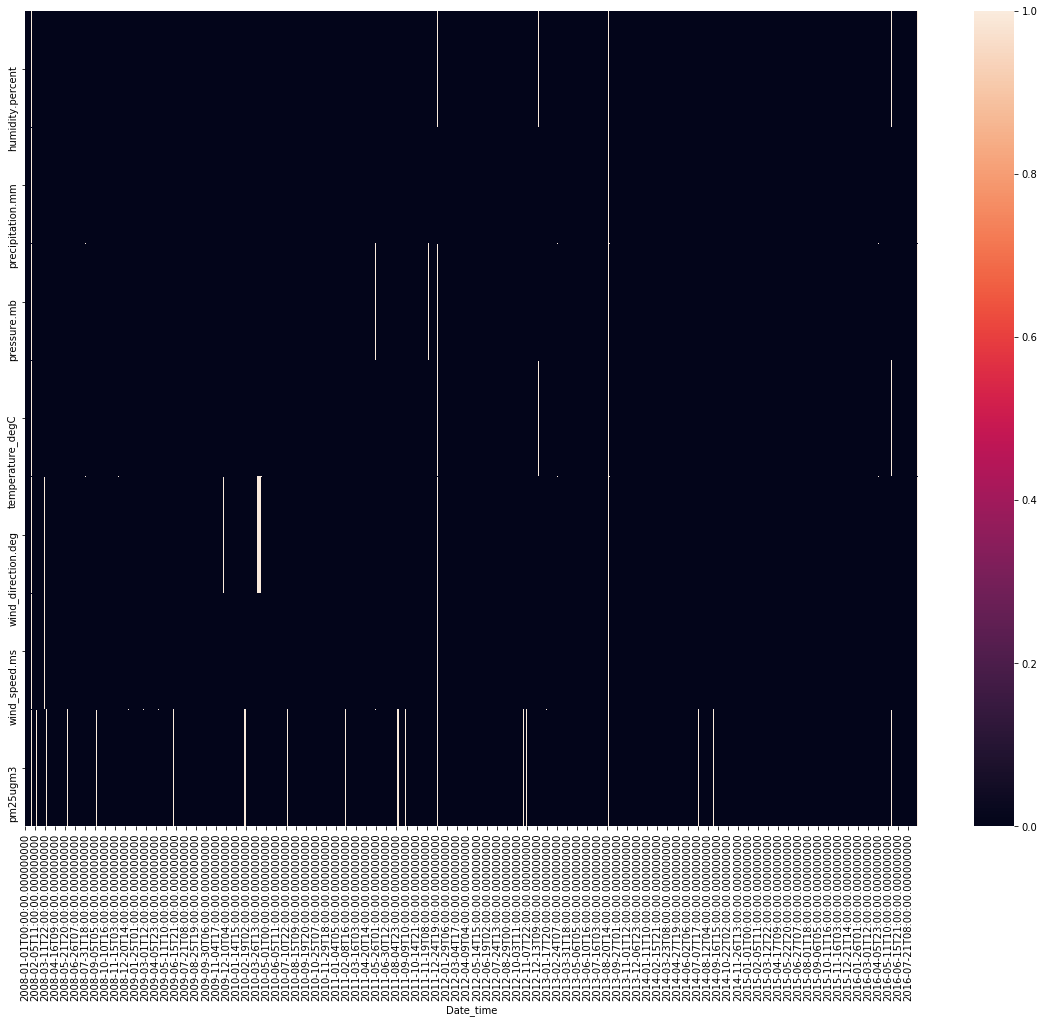

In [3]:
# Check data quality

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(20,15))

z = data.isnull()*1

ax = sns.heatmap(z.T)

plt.show()

In [4]:
# Perform univariate analysis

import numpy as np

data['PL2'] = np.where(data['pm25ugm3']>=15, 'UH', 'H')

data.head()

,humidity.percent,precipitation.mm,pressure.mb,temperature_degC,wind_direction.deg,wind_speed.ms,pm25ugm3,PL2
Date_time,,,,,,,,
2008-01-01 00:00:00,91.09,0.0,725.78,11.15,87.96,1.57,48.68,UH
2008-01-01 01:00:00,89.90,0.0,725.18,10.86,72.26,1.53,97.01,UH
2008-01-01 02:00:00,89.68,0.0,725.09,10.87,86.11,2.22,93.51,UH
2008-01-01 03:00:00,89.20,0.0,725.10,10.75,76.69,1.85,61.88,UH
2008-01-01 04:00:00,90.81,0.0,725.12,10.59,107.54,1.23,41.20,UH


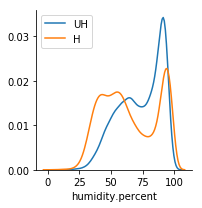

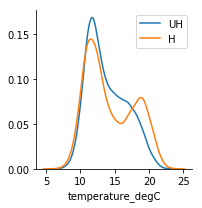

In [5]:
g = sns.FacetGrid(data, hue="PL2")
g = g.map(sns.kdeplot, "humidity.percent")
plt.legend()
plt.show()

g = sns.FacetGrid(data, hue="PL2")
g = g.map(sns.kdeplot, "temperature_degC")
plt.legend()
plt.show()

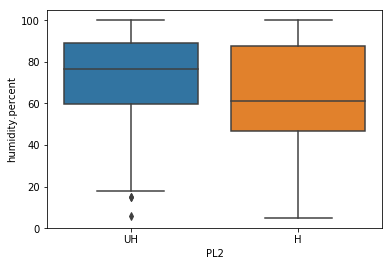

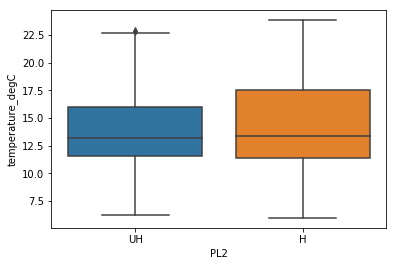

In [6]:
sns.boxplot(x="PL2", y="humidity.percent", data=data)
plt.show()

sns.boxplot(x="PL2", y="temperature_degC", data=data)
plt.show()

/home/salva/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/salva/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


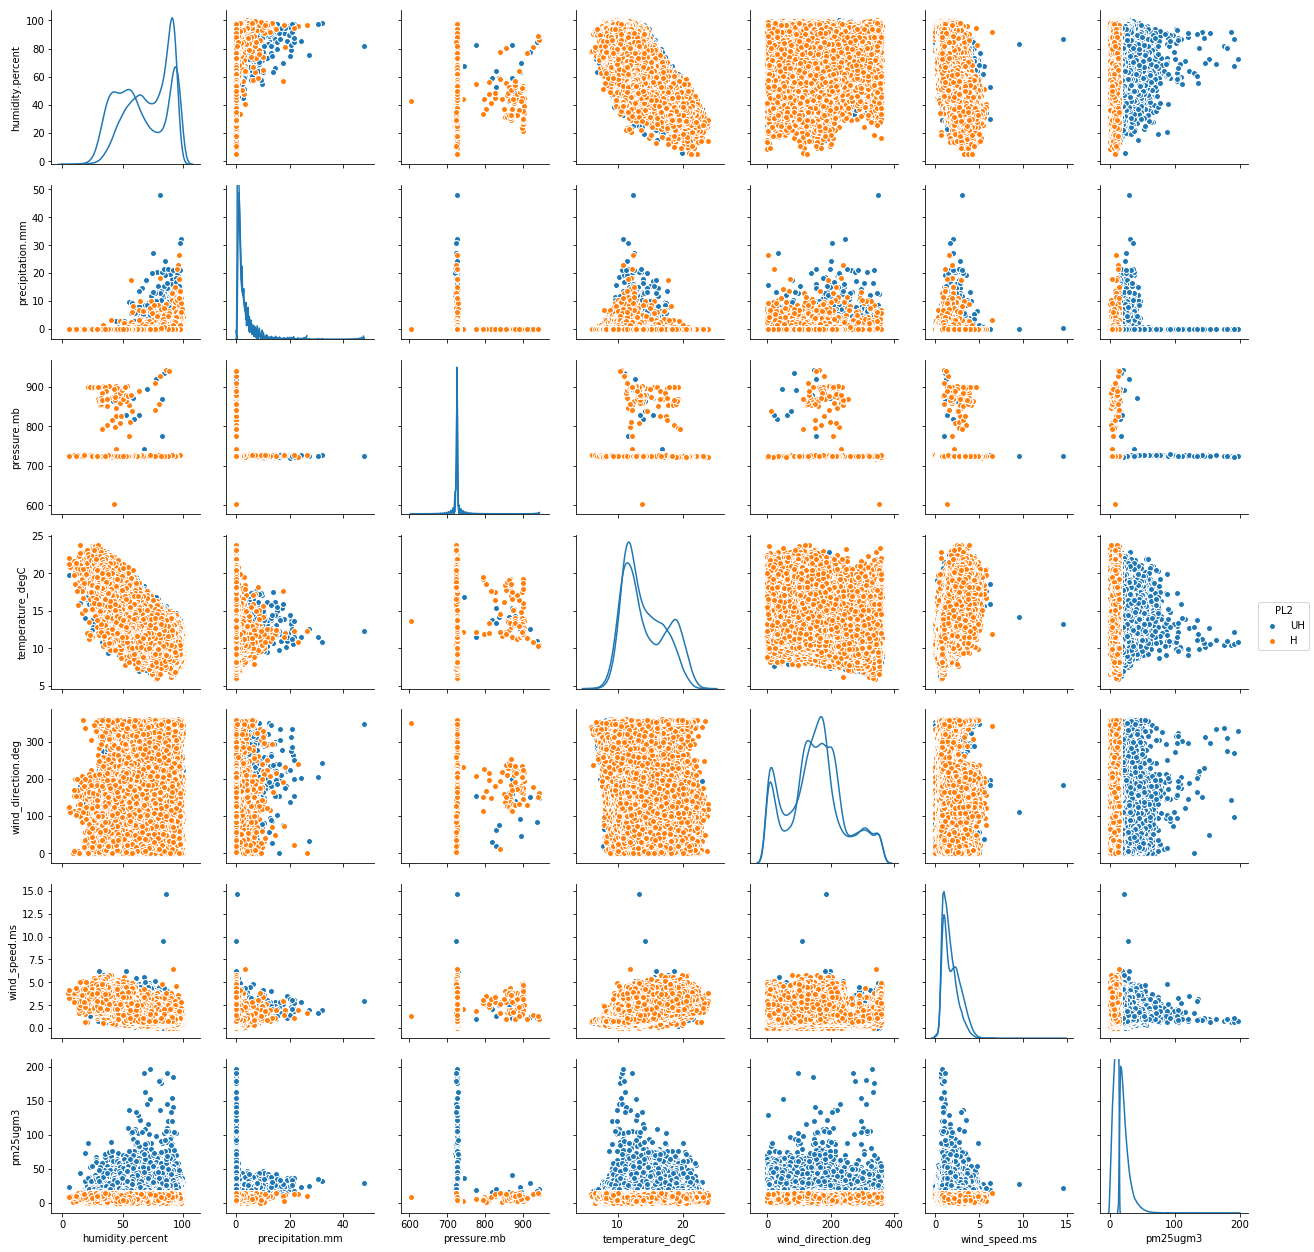

In [7]:
sns.pairplot(data, hue="PL2", diag_kind="kde")
plt.show()

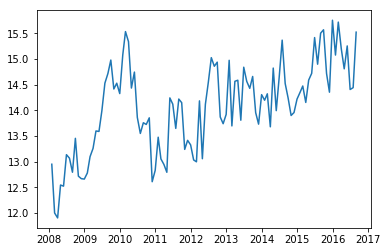

In [8]:
m_summary = pd.DataFrame()
m_summary['temperature_degC'] = data['temperature_degC'].resample('M').mean()
m_summary.head()

plt.plot(m_summary.index, m_summary['temperature_degC'], '-')
plt.show()

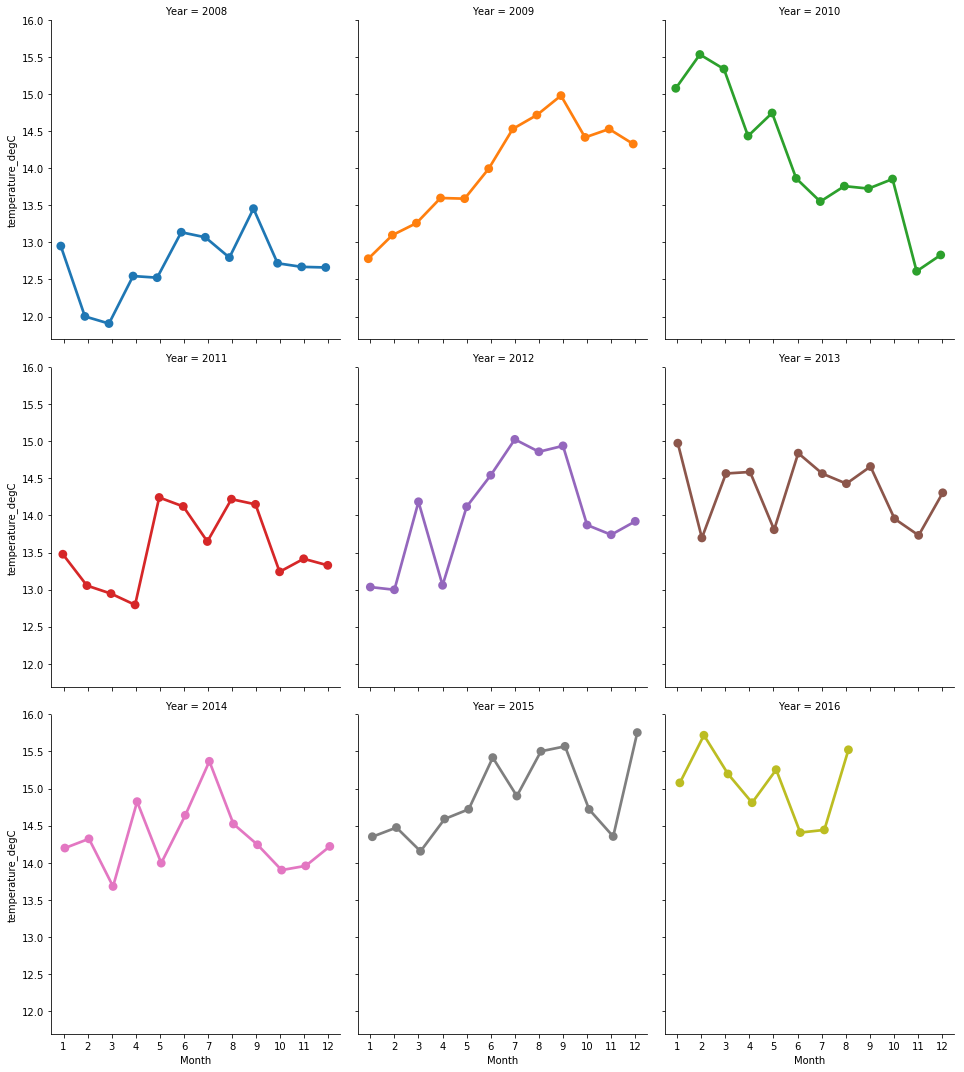

In [18]:
m_summary['Year'] = m_summary.index.year
m_summary['Month'] = m_summary.index.month

sns.factorplot(x="Month", y="temperature_degC", hue="Year", col="Year", col_wrap=3,
               data=m_summary, kind="point",
               dodge=True, size=5, aspect=0.9)

plt.show()

In [9]:
data_hourly = pd.read_csv("Belisario_Hourly.csv")

data_hourly.head()

,Year,Hour,Mean,StdDev,Count,Min,Max
0,2004,0,0.078693,0.466270,352,0,5.1
1,2004,1,0.060969,0.357832,351,0,3.4
2,2004,2,0.036467,0.224711,351,0,3.3
3,2004,3,0.039031,0.220229,351,0,2.3
4,2004,4,0.022222,0.158445,351,0,1.9


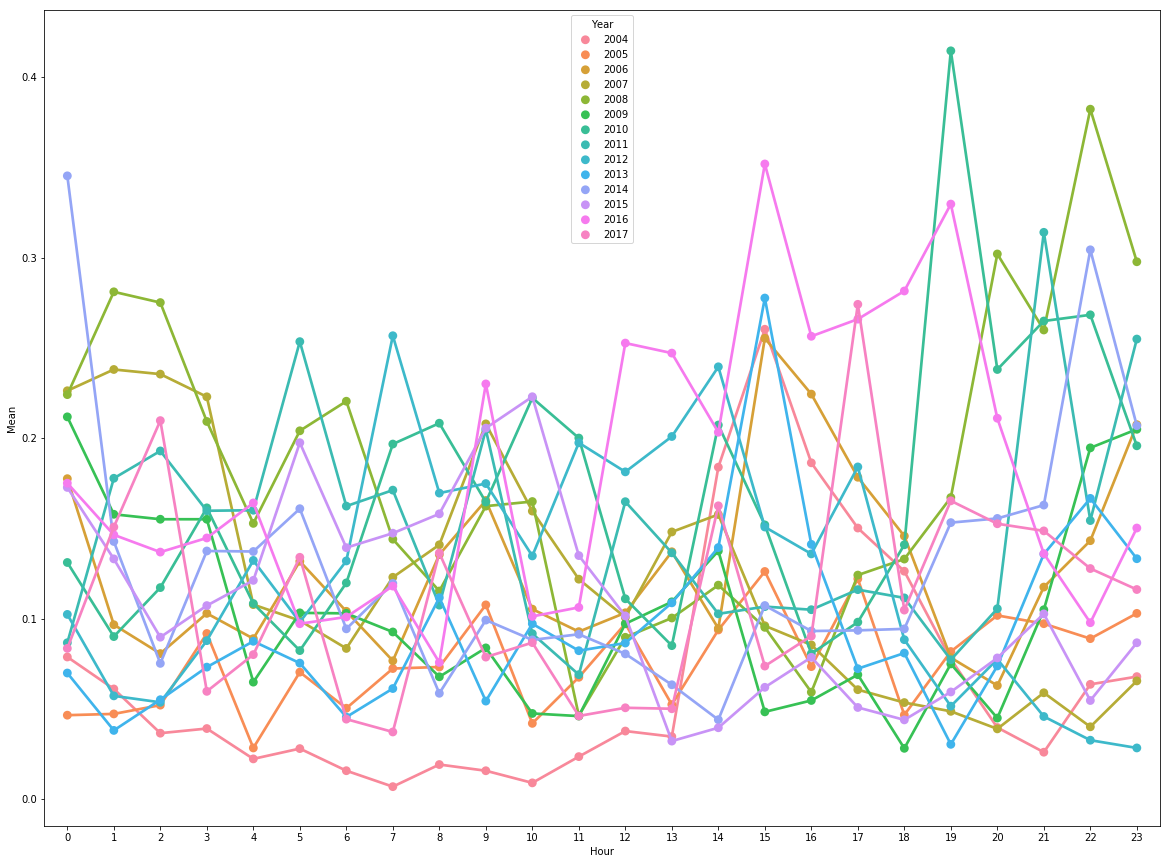

In [10]:
plt.figure(figsize=(20,15))
sns.pointplot(x="Hour", y="Mean", hue="Year", data=data_hourly)
plt.show()

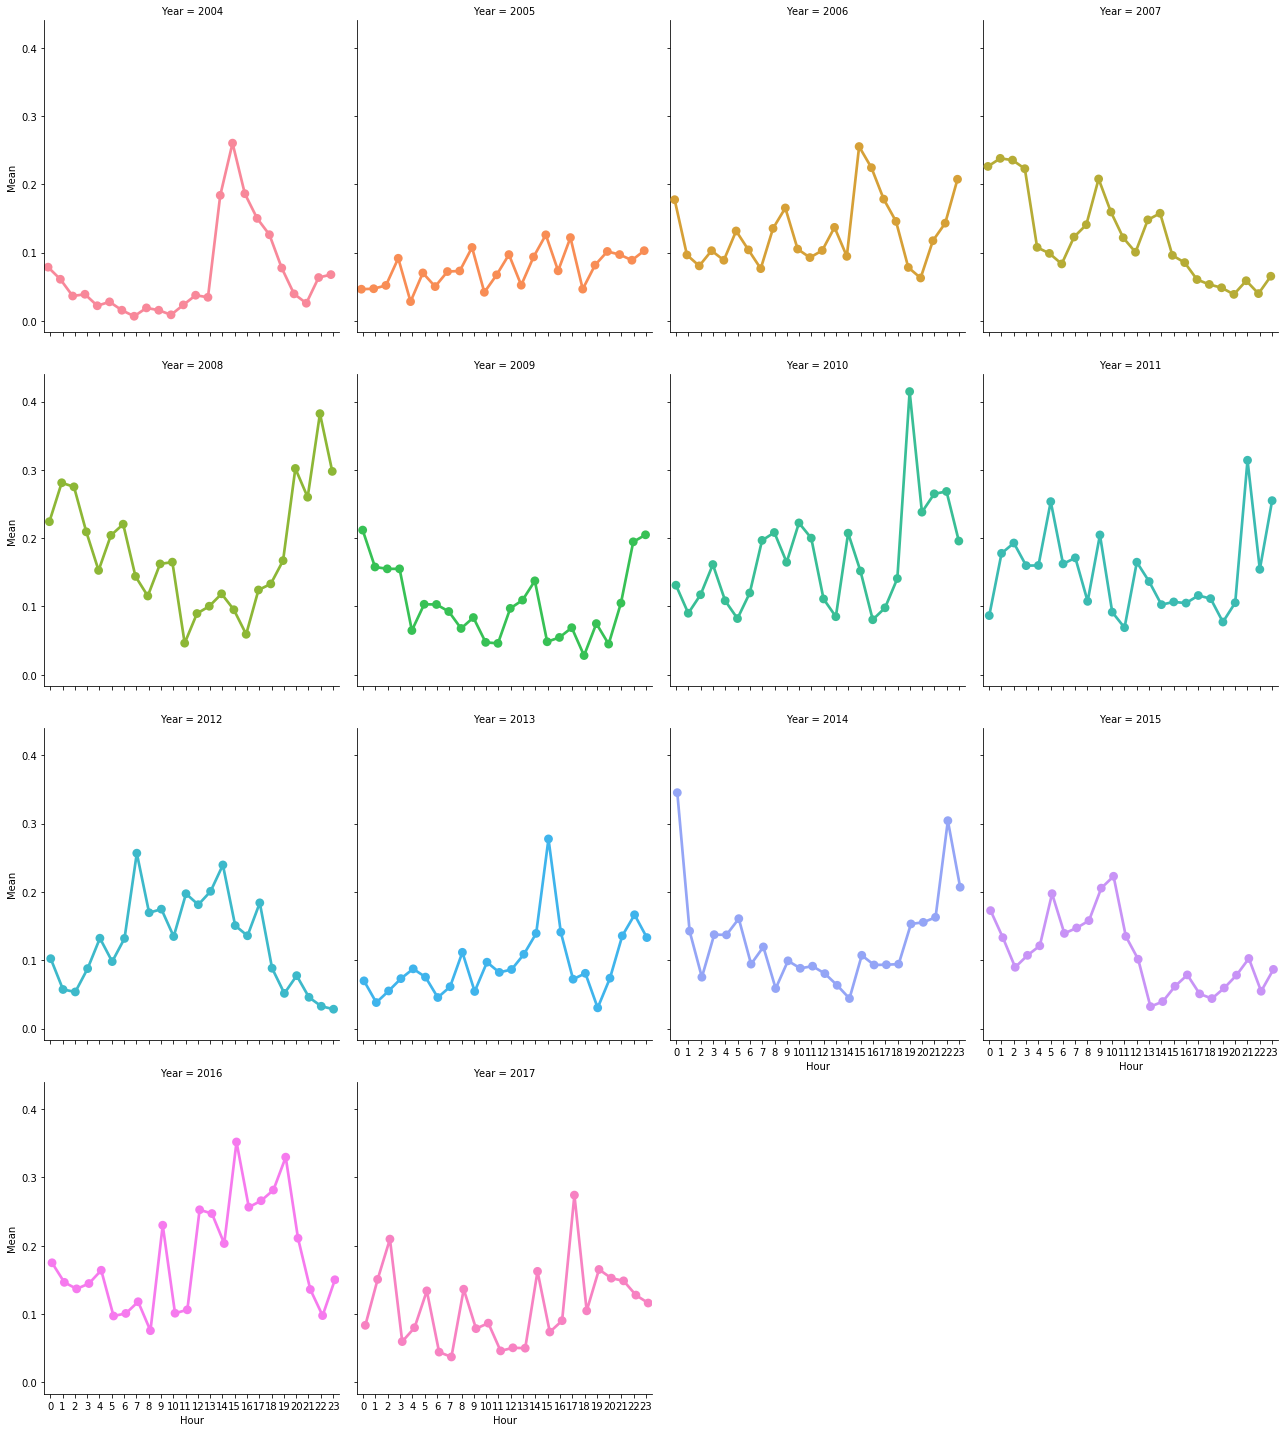

In [11]:
sns.factorplot(x="Hour", y="Mean", hue="Year", col="Year", col_wrap=4,
               data=data_hourly, kind="point",
               dodge=True, size=5, aspect=0.9)

plt.show()